In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DATA Cleaning

In [132]:
!pip install spacy
!pip install emoji --upgrade
!pip install --upgrade nltk

!python -m spacy download en_core_web_lg

import pandas as pd
import spacy
import emoji
import re
import random


# Load spaCy model with disabled components for efficiency
nlp = spacy.load('en_core_web_lg')

# Load the dataset
path = ('/content/drive/MyDrive/Data Youtube/Us_trending_data_2022_2023.csv')
#path = ('/content/drive/MyDrive/Data Youtube/US_trending.csv')
df = pd.read_csv(path)

# Set display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 15)

# Drop duplicates and unnecessary columns
df.drop_duplicates(subset=['title', 'channelTitle'], inplace=True)
df.drop(['channelId'], axis=1, inplace=True)  # Drop the 'channelId' column

print(df['categoryId'].unique())
df.head(20)

2023-12-21 04:37:35.628818: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 04:37:35.628976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 04:37:35.646770: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 04:37:39.411237: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
[23 17 28 24 20 10 25 22 27  1 19  2 26 29 15]


,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description
0,The Lawsuit of Shane Dawson,2022-02-15,shane,23,2022-02-16,shane|dawson|conspiracy|theories|journalism|investigative journalism|docuseries|documentary,1071503,77929,0,12215,"MERCH! New Mystery Pig Bags Available Now! https://www.shanedawsonmerch.com/ PODCAST IG @ShaneDawsonPodcast https://www.instagram.com/shanedawsonpodcast/?hl=enMy 2nd Youtube Channel https://www.youtube.com/channel/UCAVojJ1k03GZzjSbdXXunkwMy Instagram @Shanedawson https://www.instagram.com/shanedawson/?hl=enIn this video we have fun around the house, get deep about life’s toughest moments, and check to see if the pizza is still wonky! Enjoy!! Ryland’s Vlogs https://www.youtube.com/channel/UCVe_RrR9AMeY6Z8ixOv5gtwRyland’s Main Channel https://www.youtube.com/user/ryanadams7Ryland’s Podcast https://www.youtube.com/channel/UCH2c0ynrljAA-jW8tq3u3HARyland’s Instagram https://www.instagram.com/rylandadams/?hl=enChris’s Channel https://www.youtube.com/c/ChrisBstationChris’s Instagram https://www.instagram.com/chrisbstation/?hl=enMaxine Friend, The Psychic I Mentioned. She’s amazing!https://maxinefriend.com/https://www.instagram.com/maxinefriend/?hl=enMy Brother Jerid’s Instagram https://www.instagram.com/letsmindtravel/?hl=enJerid’s Channel https://www.youtube.com/c/LetsMindTravel/videosBusiness Contact:United Talent AgencyT: 310.273.6700"
1,When the quiet kid plays his music out loud 😂,2022-02-13,Onevilage,23,2022-02-16,Tiktok|Comedy|Foryou|Onevilage|Shorts|Hilarious|Jokes|Viral|Plot twist|Lol|Funny|Don’t flop|Recommend,2381552,289021,0,3069,🆂🆄🅱🆂🅲🆁🅸🅱🅴▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬FOLLOW THESE TO KEEP UP TO DATE:INSTAGRAM ► (onevilage) https://www.instagram.com/onevilage/DISCORD ► https://discord.io/onevilageSNAPCHAT ► (sahdude221): https://www.snapchat.com/add/sahdude221TWITTER ► (onevilage): https://twitter.com/onevilageTWITCH ► (onevilage): https://www.twitch.tv/onevilage▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬#onevilageDance credit: ashleykeno17 😂❤️e
2,Lizard Cupid 2 #shorts,2022-02-13,TheOdd1sOut,23,2022-02-16,[None],1050293,95261,0,1766,#shortsMatt Watts art ➤ https://www.instagram.com/mattwattsart/Emilee Dummer ➤ https://www.instagram.com/edummerart/ Kelly Jensen ➤ https://www.instagram.com/kelly_anne_art/Claire Anne ➤ https://www.instagram.com/claireanneillustrationAmelia Rosenbalm ➤ https://www.instagram.com/galloame/
3,how youtube is when you start watching a show,2022-02-14,Gus Johnson,23,2022-02-16,gus|gus johnson|gus meme|how youtube is when you start a show|meme|new meme|meme playlist|sketch comedy|short funny video|reddit|reddit trending|unusual memes|meme playlist funny|sven johnson|gus and sven|ian kung,292224,26736,0,2923,"please i just wanna watch the show↓COME FOLLOW ME HERE OR I WILL CRY (HARD)↓NEW MERCH: shop.gusjohnson.coGET LIVE TICKETS HERE: https://www.gusjohnson.co/tour- Twitch: https://www.twitch.tv/gusjohnson- Twitter: https://twitter.com/Gusbuckets- Instagram: https://www.instagram.com/johnsongus- Facebook: https://www.facebook.com/gustoonz- Reddit: https://www.reddit.com/r/gusjohnsonGus Johnson plays all sorts of characters, from Mitchell Robbins to JK Rowling to some guy in God's Country to Imbiamba Jombes to filming videos with his mom to pillow guy to the my pool guy to small town reviews to how they use shotguns in movies to the tough kid growing up to your friend who has a knife to spotify ad guy to the how they use shotgun to the gus johnson shotgun to if i was frozone... I don't know why I am writing this in third person. I am Gus. I wrote this. My brother is Sven Johnson, that guy's alright. Guys, if you put all this dumb stuff in the description, it helps your videos. isn't that wild?Thanks for watching and sharing! Don't stab people. I'll see you later."
4,The Metaverse is So Stupid,2022-02-15,Eddy Burback,23,2022-02-16,[None],434369,43331,0,3398,my other channel - https://www.youtube.com/channel/UCJHM5IJ44__fkOxkD4vxoBwmy tw

#Emoji custome Encodings


In [133]:

#print(df.head())
# Define regex pattern for a broader range of emojis
"""
emoji_pattern = re.compile("(["                      # Start of capture group
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"   # Enclosed characters
                           u"\U0001F100-\U0001F1FF"  # Enclosed Alphanumeric Supplement
                           u"\U0001F200-\U0001F2FF"  # Enclosed Ideographic Supplement
                           "])", flags=re.UNICODE)    # End of capture group
"""
custom_emoji_map = {
    # Add your specific emojis and their text representations here
    "🤓": "nerd_face",
    "☝️": "index_pointing_up",
    "😂": "Face_with_Tears_of_Joy",
    "😭":"Loudly_Crying_Face",
    "💔":"Broken_Heart",
    "😩":"Tired_Face",
    "🔵": "blue_cirlce",
    "🟠":"orange_circle",
    "💨":"zoom_smoke",
    "😱":"Face_Screaming_in_Fear",
    "🙄":"Face_with_Rolling_Eyes",
    "💅":"nails",
    "😍":"smiling_face_with_heart_eyes",
    "✈️":"airplane",
    "🅿️":"parking",
    "💅": "nail_care",
    "🤔": "thinking",
    "🤦": "person_facepalming",
    "🤪": "zany_face",
    "🇨": "regional_indicator_c",
    "🧟": "zombie",
    "🎉": "tada",
    "🧿": "nazar_amulet",
    "🇱": "regional_indicator_l",
    "👆": "point_up_2",
    "🤬": "face_with_symbols_over_mouth",
    "🥛": "milk",
    "🐰": "rabbit",
    "🤯": "exploding_head",
    "👹": "japanese_ogre",
    "🛡️": "shield",
    "🥇": "first_place",
    "🕯️": "candle",
    "🎈": "balloon",
    "🎥": "movie_camera",
    "🦝": "raccoon",
    "💋": "kiss",
    "⭐": "star",
    "👨": "man",
    "🎊": "confetti_ball",
    "😎": "sunglasses",
    "😫": "tired_face",
    "💪": "muscle",
    "🌲": "evergreen_tree",
    "🇿": "regional_indicator_z",
    "💇": "person_getting_haircut",
    "👀": "eyes",
    "😐": "neutral_face",
    "💍": "ring",
    "🥐": "croissant",
    "🗨️": "speech_left",
    "😡": "rage",
    "🏆": "trophy",
    "🏈": "football",
    "🎃": "jack_o_lantern",
    "🇲": "regional_indicator_m",
    "👠": "high_heel",
    "🤘": "metal",
    "🧍": "person_standing",
    "🫒": "olive",
    "🥞": "pancakes",
    "🐭": "mouse",
    "🇭": "regional_indicator_h",
    "🙌": "raised_hands",
    "🥸": "disguised_face",
    "🥘": "shallow_pan_of_food",
    "🎁": "gift",
    "🌊": "ocean",
    "👶": "baby",
    "⚽": "soccer",
    "🧐": "face_with_monocle",
    "💦": "sweat_drops",
    "😵": "dizzy_face",
    "👔": "necktie",
    "⛳": "golf",
    "🥚": "egg",
    "😅": "sweat_smile",
    "🇹": "regional_indicator_t",
    "❌": "x",
    "🛠️": "tools",
    "🧘": "person_in_lotus_position",
    "🌺": "hibiscus",
    "💩": "poop",
    "🎡": "ferris_wheel",
    "🦴": "bone",
    "🇳": "regional_indicator_n",
    "🚛": "articulated_lorry",
    "🤷": "person_shrugging",
    "😀": "grinning",
    "🤖": "robot",
    "🏔️": "mountain_snow",
    "💛": "yellow_heart",
    "💌": "love_letter",
    "🍍": "pineapple",
    "📔": "notebook_with_decorative_cover",
    "🦜": "parrot",
    "🇯": "regional_indicator_j",
    "😬": "grimacing",
    "🤩": "star_struck",
    "🔪": "knife",
    "🗣️": "speaking_head",
    "🌈": "rainbow",
    "🦯": "probing_cane",
    "😿": "crying_cat_face",
    "🪐": "ringed_planet",
    "💔": "broken_heart",
    "👾": "space_invader",
    "🐝": "bee",
    "🌴": "palm_tree",
    "🍕": "pizza",
    "🏌️": "person_golfing",
    "🐷": "pig",
    "🐐": "goat",
    "🤑": "money_mouth",
    "💤": "zzz",
    "💘": "cupid",
    "🔴": "red_circle",
    "📼": "vhs",
    "🐟": "fish",
    "😮": "open_mouth",
    "🚔": "oncoming_police_car",
    "🤣": "rofl",
    "🍭": "lollipop",
    "🍄": "mushroom",
    "😂": "joy",
    "🌅": "sunrise",
    "⚡": "zap",
    "😩": "weary",
    "🌎": "earth_americas",
    "💫": "dizzy",
    "🌌": "milky_way",
    "📰": "newspaper",
    "👁️": "eye",
    "🫖": "teapot",
    "😈": "smiling_imp",
    "🤫": "shushing_face",
    "🦖": "t_rex",
    "🦇": "bat",
    "🍊": "tangerine",
    "🍳": "cooking",
    "🥳": "partying_face",
    "🍖": "meat_on_bone",
    "💕": "two_hearts",
    "🧈": "butter",
    "🎂": "birthday",
    "🍞": "bread",
    "👼": "angel",
    "🌀": "cyclone",
    "🇵": "regional_indicator_p",
    "✈️": "airplane",
    "𝗦": "mathematical_sans_serif_bold_capital_S",
    "𝘥": "mathematical_sans_serif_italic_small_D",
    "𝘳": "mathematical_sans_serif_italic_small_R",
    "𝐙": "mathematical_bold_capital_Z",
    "𝘸": "mathematical_sans_serif_italic_small_W",
    "𝐓": "mathematical_bold_capital_T",
    "𝗧": "'mathematical_sans_serif_bold_capital_T",
    "𝙈": "mathematical_sans_serif_bold_italic_capital_M",
    "𝐔": "mathematical_bold_capital_U",
    "𝗡": "mathematical_sans_serif_bold_capital_N",
    "𝙀": "mathematical_sans_serif_bold_italic_capital_E",
    "𝐎": "mathematical_bold_capital_O",
    "🫶": "heart_hands",
    "♥": "black_heart_suit",
    "❤": "heavy_black_heart",
    "☠": "skull_and_crossbones",
    "🫣": "face_with_peeking_eye",
    "𝗟": "mathematical_sans_serif_bold_capital_L",
    "𝗔": "mathematical_sans_serif_bold_capital_A",
    "𝗖": "mathematical_sans_serif_bold_capital_C",
    "㎡": "square_m_squared",
    "♪": "eighth_note",
    "★": "black_star",
    "🫡": "saluting_face",
    "🥹": "face_holding_back_tears",
    "＜": "fullwidth_less_than_sign",
    "～": "fullwidth_tilde",
    "♀": "female_sign",
   "﹥": "small_greater_than_sign",
    "｜": "fullwidth_vertical_line",
    "𝘴": "mathematical_sans_serif_italic_small_S",
    "⛏": "pick",
    "𝘩": "mathematical_sans_serif_italic_small_H",
    "𝘢": "mathematical_sans_serif_italic_small_A",
     "🦲": "emoji_component_bald",
    "👑": "crown",
    "👐": "open_hands",
    "🍦": "icecream",
    "🗿": "moyai",
    "😏": "smirk",
    "🧸": "teddy_bear",
    "😜": "stuck_out_tongue_winking_eye",
    "🇧": "regional_indicator_b",
    "🍿": "popcorn",
    "🔨": "hammer",
    "🎤": "microphone",
    "🇮": "regional_indicator_i",
    "𝐃": "mathematical_bold_capital_D",
    "🚨": "rotating_light",
    "🎀": "ribbon",
    "🗺️": "map",
    "💒": "wedding",
    "✧": "white_four_pointed_star",
    "𝘾": "mathematical_sans_serif_bold_italic_capital_C",
    "🍀": "four_leaf_clover",
    "🔥": "fire",
    "😭": "sob",
    "🇬": "regional_indicator_g",
    "🐶": "dog",
    "🤝": "handshake",
    "🥕": "carrot",
    "💆": "person_getting_massage",
    "🏡": "house_with_garden",
    "😢": "cry",
    "💶": "euro",
    "🚀": "rocket",
    "🇷": "regional_indicator_r",
    "𝐍": "mathematical_bold_capital_N",
    "𝙍": "mathematical_sans_serif_bold_italic_capital_R",
    "►": "black_right_pointing_pointer",
    "🤍": "white_heart",
    "👊": "punch",
    "👸": "princess",
    "⚠": "warning_sign",
    "🍸": "cocktail",
    "😲": "astonished",
    "🎓": "mortar_board",
    "🌋": "volcano",
    "🇩": "regional_indicator_d",
    "💙": "blue_heart",
    "😤": "triumph",
    "🙈": "see_no_evil",
    "🙄": "rolling_eyes",
    "𝗘": "mathematical_sans_serif_bold_capital_E",
    "👏": "clap",
    "🐸": "frog",
    "𝐁": "mathematical_bold_capital_B",
    "😳": "flushed",
    "𝗥": "mathematical_sans_serif_bold_capital_R",
    "🍓": "strawberry",
    "🎯":"dart" ,
    "🍟":"fries",
    "🔮":"crystal_ball",
    "🇸":"regional_indicator_s",
    "💰":"moneybag",
    "☕":"coffee",
    "🥥":"coconut",
    "🏀":"basketball",
    "🤐":"zipper_mouth",
    "💗":"heartpulse",
    "🏳":"flag_white",
    "☝":"Index_Pointing_Up",
    "✿":"soccerball",
    "💡":"bulb",
    "☀":"white_sun",
    "👻":"ghost",
    "🎄":"christmas_tree",
    "🥺":"pleading_face",
    "🏥":"hospital",
    "🔆":"high_brightness",
    "🎲":"game_dice",
    "🚗":"red_car",
    "🍌":"banana",
    "🏠":"house",
    "🚫":"no_entry_sign",
    "😱":"scream",
    "🚂":"steam_locomotive",
    "🏝":"island",
    "🎼":"musical_score",
    "👜":"handbag",
    "🥵":"hot_face",
    "♠":"BLACK_SPADE_SUIT",
    "🤜":"right_facing_fist",
    "𝗠":"MATHEMATICAL_SANS_SERIF_BOLD_CAPITAL_M",
    "🦂":"scorpion",
    "🤺":"person_fencing",
    "🤢":"nauseated_face",
    "💖":"sparkling_heart",
    "👄":"lips",
    "🇴":"regional_indicator_o",
    "🍋":"lemon",
    "𝘵":"MATHEMATICAL_SANS_SERIF_ITALIC_SMALL_T",
    "🌶️":"hot_pepper",
    "💯":"100",
    "🏁":"checkered_flag",
    "🩸":"drop_of_blood",
    "👍":"thumbsup",
    "👮":"police_officer",
    "🦓":"zebra",
    "𝐆":"MATHEMATICAL_BOLD_CAPITAL_G",
    "🤟":"love_you_gesture",
    "🇫":"regional_indicator_f",
    "🐊":"crocodile",
    "🇽":"regional_indicator_x",
    "🤭":"face_with_hand_over_mouth",
    "💸":"money_with_wings",
    "✰":"SHADOWED_WHITE_STAR",
    "😞":"disappointed",
    "🪚":"carpentry_saw",
    "🎵":"musical_note",
    "😰":"cold_sweat",
    "🚘":"oncoming_automobile",
    "🇪":"regional_indicator_e",
    "🟥":"red_square",
    "⚔":"CROSSED_SWORDS",
    "🇺":"regional_indicator_u",
    "🥰":"smiling_face_with_3_hearts",
    "𝐀":"MATHEMATICAL_BOLD_CAPITAL_A",
    "❗":"exclamation",
    "🥴":"woozy_face",
    "𝘼":"MATHEMATICAL_SANS_SERIF_BOLD_ITALIC_CAPITAL_A",
    "🐱":"cat",
    "🎆":"fireworks",
    "１":"FULLWIDTH_DIGIT_ONE",
    "🦋":"butterfly",
    "♡":"WHITE_HEART_SUIT",
    "🏰":"european_castle",
    "🍻":"beers",
    "🌸":"cherry_blossom",
    "𝘪":"MATHEMATICAL_SANS_SERIF_ITALIC_SMALL_I",
    "𝐒":"MATHEMATICAL_BOLD_CAPITAL_S",
    "🥊":"boxing_glove",
    "😁":"grin",
    "🌿":"herb",
    "🤏":"pinching_hand",
    "🌟":"start2",
    "𝗜":"MATHEMATICAL_SANS_SERIF_BOLD_CAPITAL_I",
    "⤴":"ARROW_POINTING_RIGHTWARDS_THEN_CURVING_UPWARDS",
    "💀":"skull",
    "♬":"BEAMED_SIXTEENTH_NOTES",
    "🥲":"smiling_face_with_tear",
    "😉":"wink",
    "⛰":"MOUNTAIN",
    "🎮":"video_game",
    "💥":"boom",
    "🇦":"regional_indicator_a",
    "🎨":"art",
    "𝘧":"MATHEMATICAL_SANS_SERIF_ITALIC_SMALL_F",
    "𝘦":"MATHEMATICAL_SANS_SERIF_ITALIC_SMALL_E",
    "🎬":"clapper",
    "🌙":"crescent_moon",
    "🖤":"black_heart",
    "🎙️":"microphone2",
    "😘":"kissing_heart",
    "﹤":"SMALL_LESS_THAN_SIGN",
    "🌰":"chestnut",
    "📱":"mobile_phone",
    "🔋":"battery",
    "♨":"HOT_SPRINGS",
    "🧝":"elf",
    "🙏":"pray",
    "🕊️":"dove",
    "📦":"package",
    "𝐄":"MATHEMATICAL_BOLD_CAPITAL_E",
    "🙅":"person_gesturing_no",
    "𝐈":"MATHEMATICAL_BOLD_CAPITAL_I",
    "📸":"camera_with_flash",
    "�" : "	REPLACEMENT CHARACTER"
}

In [134]:
# Filter for Shorts
shorts_keywords = ['#Shorts', '#short', 'Shorts', 'shorts']
shorts_pattern = '|'.join(shorts_keywords)
df = df[~df['title'].str.contains(shorts_pattern, na=False) &
        ~df['description'].str.contains(shorts_pattern, na=False) &
        ~df['channelTitle'].str.contains(shorts_pattern, na=False)]

# Function to insert spaces between consecutive emojis
def add_spaces_between_emojis(text):
    spaced_text = ""
    previous_char = None

    for char in text:
        if char in emoji.EMOJI_DATA and previous_char in emoji.EMOJI_DATA:
            spaced_text += " " + char
        else:
            spaced_text += char
        previous_char = char

    return spaced_text

# Function to encode emojis using the emoji library and/or custom_emoji_map
def encode_emojis(text):
    # First, add spaces between adjacent emojis
    spaced_text = add_spaces_between_emojis(text)

    # Use emoji library to replace emojis with their textual representation
    text_with_emojis_encoded = emoji.demojize(spaced_text, delimiters=(" ", " "))

    # Further replace using custom_emoji_map
    for emoji_char, emoji_text in custom_emoji_map.items():
        text_with_emojis_encoded = text_with_emojis_encoded.replace(emoji_char, f" {emoji_text} ")

    return text_with_emojis_encoded


# process_title excluding emojies
def process_text(text):
    # Apply string manipulations before tokenization
    text = text.replace('|', ' ')
    # Process with spaCy
    doc = nlp(text)

    # Tokenize, lemmatize, remove stop words, punctuation, and non-alphabetic tokens
    processed_text = ' '.join([token.lemma_.lower() for token in doc
                               if not token.is_stop and not token.is_punct and token.is_alpha])
    return processed_text

def process_text_with_emojis(text):
    # Apply string manipulations before tokenization
    text = text.replace('|', ' ')
    text = encode_emojis(text)

    # Process with spaCy
    doc = nlp(text)

    # Tokenize, lemmatize, remove stop words, punctuation, but keep emojis
    processed_text = ' '.join([token.lemma_.lower() for token in doc
                               if not token.is_stop and not token.is_punct or token.text.startswith(':') and token.text.endswith(':')])
    return processed_text


# Batch processing function with enhanced processing
def process_text_batch(texts, batch_size=1500):
    return [process_text(text) for text in texts]

#removing '|' and adding a space to tags
def clean_tags(tags_string):
    if pd.isna(tags_string):
        return ""
    return ' '.join([tag.strip() for tag in tags_string.split('|')])

# Apply the batch processing to 'title' and 'cleaned_tags'
df['processed_title'] = process_text_batch(df['title'].astype(str).tolist())
df['cleaned_tags'] = df['tags'].apply(clean_tags).apply(lambda x: process_text(x))
df['processed_title_with_emojis'] = process_text_batch(df['title'].astype(str).tolist())

# Applying tag cleaning
df['cleaned_tags'] = df['tags'].apply(clean_tags).str.strip()

#trimming spaces in 'cleaned_tags', 'title', and 'processed_title'
df['title'] = df['title'].str.strip()
df['processed_title'] = df['processed_title'].str.strip()
df['processed_title_with_emojis'] = df['processed_title_with_emojis'].str.strip()

print("__________________________________________________________________________________________________\n")

# Print the number of rows in the DataFrame
print("Total number of rows in DataFrame:", df.shape[0])

# Print samples of the DataFrame
random_starts = random.sample(range(len(df) - 15), 3)
for start in random_starts:
    print(f"Sample Records starting from index {start}:")
    print(df.iloc[start:start+15, [df.columns.get_loc(c) for c in ('title', 'processed_title', 'cleaned_tags', 'tags')]])
    print("\n---\n")

__________________________________________________________________________________________________

Total number of rows in DataFrame: 25227
Sample Records starting from index 20800:
                                                                                            title                                                            processed_title                                                                                                                                                                                                                                                                                                                                                                                                                                                               cleaned_tags                                                                                                                                                                                          

#Checks and returns a list of emojis not encoded

In [135]:
"""
def find_unencoded_emojis(processed):
    # Find any characters in processed text that are still emojis
    unencoded_emojis = [char for char in processed if char in emoji.EMOJI_DATA]

    return unencoded_emojis

# Apply the function to the DataFrame
df['unencoded_emojis'] = df['processed_title'].apply(find_unencoded_emojis)

# Filter to find rows with unencoded emojis
rows_with_unencoded_emojis = df[df['unencoded_emojis'].apply(lambda x: len(x) > 0)]

# Display the results
print("Titles with Unencoded Emojis:")
print(rows_with_unencoded_emojis[['title', 'processed_title', 'unencoded_emojis']])
print("Total number of rows in DataFrame:", rows_with_unencoded_emojis.shape[0])
"""

'\ndef find_unencoded_emojis(processed):\n    # Find any characters in processed text that are still emojis\n    unencoded_emojis = [char for char in processed if char in emoji.EMOJI_DATA]\n\n    return unencoded_emojis\n\n# Apply the function to the DataFrame\ndf[\'unencoded_emojis\'] = df[\'processed_title\'].apply(find_unencoded_emojis)\n\n# Filter to find rows with unencoded emojis\nrows_with_unencoded_emojis = df[df[\'unencoded_emojis\'].apply(lambda x: len(x) > 0)]\n\n# Display the results\nprint("Titles with Unencoded Emojis:")\nprint(rows_with_unencoded_emojis[[\'title\', \'processed_title\', \'unencoded_emojis\']])\nprint("Total number of rows in DataFrame:", rows_with_unencoded_emojis.shape[0])\n'

In [136]:
from typing import List

#Spacy text analysis for the process_titles
# Function for POS Tagging in Batches
def pos_tagging_batch(texts: List[str], batch_size=1500):
    pos_tags = []
    for doc in nlp.pipe(texts, batch_size=batch_size):
        pos_tags.append([(token.text, token.pos_) for token in doc])
    return pos_tags

# Function for Noun Phrase Extraction in Batches
def extract_noun_phrases_batch(texts: List[str], batch_size=1500):
    noun_phrases = []
    for doc in nlp.pipe(texts, batch_size=batch_size):
        noun_phrases.append([chunk.text for chunk in doc.noun_chunks])
    return noun_phrases

# Function for Entity Detection in Batches
def detect_entities_batch(texts: List[str], batch_size=1500):
    entities = []
    for doc in nlp.pipe(texts, batch_size=batch_size):
        entities.append([(entity.text, entity.label_) for entity in doc.ents])
    return entities

# Apply batch processing to 'processed_title'
df['title_pos'] = pos_tagging_batch(df['processed_title'].tolist())
df['title_noun_phrases'] = extract_noun_phrases_batch(df['processed_title'].tolist())
df['title_entities'] = detect_entities_batch(df['processed_title'].tolist())


##Adding the the Category Name


In [137]:
#new df for readability
df_encoded = df.drop(["description", "tags"], axis = 1)

# Load the dataset for cat
path = ('/content/drive/MyDrive/Data Youtube/Youtube_dataCat.csv')
df_cat_info = pd.read_csv(path)

# Merge df_encoded and df_cat_info
new_df = pd.merge(df_encoded, df_cat_info, left_on='categoryId', right_on='CategoryID2', how='inner')
new_df = new_df.drop(["CategoryID2"],axis = 1 )


# Count of null or empty values in 'processed_title'
null_or_empty = new_df['processed_title'].isna() | (new_df['processed_title'] == '')

# Keep only rows where 'processed_title' is not null and not empty
new_df = new_df[~null_or_empty]

# Reset the index if necessary
new_df.reset_index(drop=True, inplace=True)

print("Total number of rows in DataFrame:", new_df.shape[0])
new_df = new_df.drop(["processed_title_with_emojis"], axis = 1)
print(new_df.head(25))

Total number of rows in DataFrame: 25173
                                                                                                  title publishedAt          channelTitle  categoryId trending_date  view_count   likes  dislikes  comment_count                                                                       processed_title                                                                                                                                                                                                           cleaned_tags                                                                                                                                                                                                                                             title_pos                     title_noun_phrases                                                                                                             title_entities CategotyNames
0                          

# Pandas to Spark df adaptation


In [138]:
!pip install pyspark

import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, ArrayType, DateType, IntegerType
from py4j.protocol import Py4JJavaError
from pyspark.sql.functions import col
import json

# Start a Spark session
spark = SparkSession.builder.appName('YouTubeDataProcessing').getOrCreate()

# Replace None in 'cleaned_tags' with 'No tags' if necessry and cast integer columns
new_df['cleaned_tags'] = new_df['cleaned_tags'].fillna('No tags')
new_df['categoryId'] = pd.to_numeric(new_df['categoryId'], errors='coerce').fillna(0).astype(int)
new_df['view_count'] = pd.to_numeric(new_df['view_count'], errors='coerce').fillna(0).astype(int)
new_df['likes'] = pd.to_numeric(new_df['likes'], errors='coerce').fillna(0).astype(int)
new_df['dislikes'] = pd.to_numeric(new_df['dislikes'], errors='coerce').fillna(0).astype(int)
new_df['comment_count'] = pd.to_numeric(new_df['comment_count'], errors='coerce').fillna(0).astype(int)
new_df['title_pos'] = new_df['title_pos'].apply(json.dumps)
new_df['title_entities'] = new_df['title_entities'].apply(json.dumps)

#print columns to match to a spark_df
print(len(new_df.columns))

# Convert the pandas DataFrame to a Spark DataFrame
spark_df = spark.createDataFrame(new_df)

print(spark_df)

# Convert date columns to DateType (only year-month-day)
spark_df = spark_df.withColumn('publishedAt', spark_df['publishedAt'].cast(DateType()))
spark_df = spark_df.withColumn('trending_date', spark_df['trending_date'].cast(DateType()))

# Drop unnecessary columns
spark_df = spark_df.drop('processed_title_with_emojis')

# Rename columns if necessary
spark_df = spark_df.withColumnRenamed('CategotyNames', 'CategoryNames')

# Define a schema that includes ArrayType for complex structures and IntegerType for relevant fields
schema = StructType([
    StructField("title", StringType(), nullable=True),
    StructField("publishedAt", DateType(), nullable=True),
    StructField("channelTitle", StringType(), nullable=True),
    StructField("categoryId", IntegerType(), nullable=True),
    StructField("trending_date", DateType(), nullable=True),
    StructField("view_count", IntegerType(), nullable=True),
    StructField("likes", IntegerType(), nullable=True),
    StructField("dislikes", IntegerType(), nullable=True),
    StructField("comment_count", IntegerType(), nullable=True),
    StructField("processed_title", StringType(), nullable=True),
    StructField("cleaned_tags", StringType(), nullable=True),
    StructField("title_pos", StringType(), nullable=True),
    StructField("title_noun_phrases", StringType(), nullable=True),
    StructField("title_entities", StringType(), nullable=True),
    StructField("CategoryNames", StringType(), nullable=True),
])

# Apply the schema to the DataFrame
spark_df = spark.createDataFrame(spark_df.rdd, schema)

# Verify the DataFrame
spark_df.printSchema()


# Check for null values in each column
for column in spark_df.columns:
    null_count = spark_df.filter(col(column).isNull()).count()
    if null_count > 0:
        print(f"Column {column} has {null_count} null values")
    else:
        print(f"Column {column} has no null values")

# Show the first few rows of the DataFrame
# showing individual columns for pandas df --> spark df convergence
#try:
    #spark_df.select("title").show()
    #spark_df.select("publishedAt").show()
    #spark_df.select("channelTitle").show()
    #spark_df.select("categoryId").show()
    #spark_df.select("trending_date").show()
    #spark_df.select("view_count").show()
    #spark_df.select("likes").show()
    #spark_df.select("dislikes").show()
    #spark_df.select("comment_count").show()
    #spark_df.select("processed_title").show()
    #spark_df.select("cleaned_tags").show()
    #spark_df.select("title_pos").show()
    #spark_df.select("title_noun_phrases").show()
    #spark_df.select("title_entities").show()
    #spark_df.select("CategoryNames").show()

    # Add more columns gradually...
#except Py4JJavaError as e:
 #   print("Error showing DataFrame column:", e)

spark_df.show(20, truncate=False)


15
DataFrame[title: string, publishedAt: string, channelTitle: string, categoryId: bigint, trending_date: string, view_count: bigint, likes: bigint, dislikes: bigint, comment_count: bigint, processed_title: string, cleaned_tags: string, title_pos: string, title_noun_phrases: array<string>, title_entities: string, CategotyNames: string]
root
 |-- title: string (nullable = true)
 |-- publishedAt: date (nullable = true)
 |-- channelTitle: string (nullable = true)
 |-- categoryId: integer (nullable = true)
 |-- trending_date: date (nullable = true)
 |-- view_count: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- processed_title: string (nullable = true)
 |-- cleaned_tags: string (nullable = true)
 |-- title_pos: string (nullable = true)
 |-- title_noun_phrases: string (nullable = true)
 |-- title_entities: string (nullable = true)
 |-- CategoryNames: string (nullable = true)

Column 

#Word Embeding

In [139]:
from pyspark.ml.feature import Tokenizer, Word2Vec

# Tokenize 'processed_title' and 'cleaned_tags'
tokenizer = Tokenizer(inputCol="processed_title", outputCol="processed_title_words")
spark_df = tokenizer.transform(spark_df)
tokenizer.setInputCol("cleaned_tags").setOutputCol("cleaned_tags_words")
spark_df = tokenizer.transform(spark_df)

# Word2Vec embedding
word2Vec = Word2Vec(vectorSize=100, inputCol="processed_title_words", outputCol="processed_title_features")
spark_df = word2Vec.fit(spark_df).transform(spark_df)
word2Vec.setInputCol("cleaned_tags_words").setOutputCol("cleaned_tags_features")
spark_df = word2Vec.fit(spark_df).transform(spark_df)


In [140]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Check if CategoryNamesIndex and CategoryNamesVec already exist
if not ('CategoryNamesIndex' in spark_df.columns and 'CategoryNamesVec' in spark_df.columns):
    # Define the stages for the Pipeline
    stages = []
    # If the index column for 'CategoryNames' doesn't exist, create it using StringIndexer
    if 'CategoryNamesIndex' not in spark_df.columns:
        indexer = StringIndexer(inputCol="CategoryNames", outputCol="CategoryNamesIndex")
        stages.append(indexer)
    # If the One-Hot Encoded column for 'CategoryNames' doesn't exist, create it using OneHotEncoder
    if 'CategoryNamesVec' not in spark_df.columns:
        encoder = OneHotEncoder(inputCol="CategoryNamesIndex", outputCol="CategoryNamesVec")
        stages.append(encoder)

    # Define and run the Pipeline if necessary
    if stages:
        # A Pipeline chains multiple Transformers and Estimators together
        pipeline = Pipeline(stages=stages)
        spark_df = pipeline.fit(spark_df).transform(spark_df)

# Show the DataFrame to confirm the changes
spark_df.show(truncate=False)


+-------------------------------------------------------+-----------+--------------------+----------+-------------+----------+------+--------+-------------+---------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------+---------------------------------+-------------------------------------------+-------------+----------------------------------------------+----------------------------------------------------------------------------------

#Engagement Metrics Reduction (MinMaxSxaler) & dropping dislikes

In [141]:
from pyspark.sql.functions import datediff, col, udf
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.types import DoubleType
import pyspark.sql.functions as F


# Calculate the difference in days and create a new column 'days_until_trending'
spark_df = spark_df.withColumn("days_until_trending", datediff(col("trending_date"), col("publishedAt")))

# Function to convert a column to a vector
def to_vector(col_name):
    return udf(lambda x: Vectors.dense(x), VectorUDT())(col(col_name))

# Define a list of columns to be vectorized and scaled
columns_to_scale = ["view_count", "likes", "comment_count", "days_until_trending"]

# Apply VectorAssembler and MinMaxScaler to each column
for col_name in columns_to_scale:
    vec_col_name = col_name + "_vec"
    scaled_col_name = col_name + "_scaled"

    # Check if vector column already exists
    if vec_col_name not in spark_df.columns:
        # Convert column to vector
        spark_df = spark_df.withColumn(vec_col_name, to_vector(col_name))

    # Check if scaled column already exists
    if scaled_col_name not in spark_df.columns:
        # Apply MinMaxScaler
        scaler = MinMaxScaler(inputCol=vec_col_name, outputCol=scaled_col_name)
        spark_df = scaler.fit(spark_df).transform(spark_df)

        # Extract scaled values from vectors
        get_first_element = udf(lambda v: float(v[0]), DoubleType())
        spark_df = spark_df.withColumn(scaled_col_name, get_first_element(col(scaled_col_name)))

# Drop dislikes column
spark_df = spark_df.drop("dislikes")

# Show the DataFrame to confirm the changes
spark_df.select("view_count", "view_count_scaled", "likes", "likes_scaled", "comment_count", "comment_count_scaled", "days_until_trending", "days_until_trending_scaled").show()


+----------+--------------------+------+--------------------+-------------+--------------------+-------------------+--------------------------+
|view_count|   view_count_scaled| likes|        likes_scaled|comment_count|comment_count_scaled|days_until_trending|days_until_trending_scaled|
+----------+--------------------+------+--------------------+-------------+--------------------+-------------------+--------------------------+
|   1071503|0.007681329149100798| 77929|0.008977388280308694|        12215|0.011244136295685344|                  1|         0.513909224011713|
|   2381552| 0.01707273315865593|289021| 0.03329509859183486|         3069|0.002825071984564...|                  3|        0.5168374816983895|
|    292224|0.002094878623080...| 26736|0.003079976043094...|         2923|0.002690676249880...|                  2|        0.5153733528550513|
|    434369| 0.00311387953292316| 43331|0.004991713118018...|         3398|0.003127922646970...|                  1|         0.513909224

#Helper function to drop any columns with pca

In [148]:
'''
pca_cols = ['processed_title_features', 'cleaned_tags_features', 'CategoryNamesVec']
pca_transformed_cols = [col + "_pca" for col in pca_cols]

# Drop existing PCA columns
for col in pca_transformed_cols:
    if col in spark_df.columns:
        spark_df = spark_df.drop(col)
'''

'\npca_cols = [\'processed_title_features\', \'cleaned_tags_features\', \'CategoryNamesVec\']\npca_transformed_cols = [col + "_pca" for col in pca_cols]\n\n# Drop existing PCA columns\nfor col in pca_transformed_cols:\n    if col in spark_df.columns:\n        spark_df = spark_df.drop(col)\n'

#Elbow Method feature selection for regression

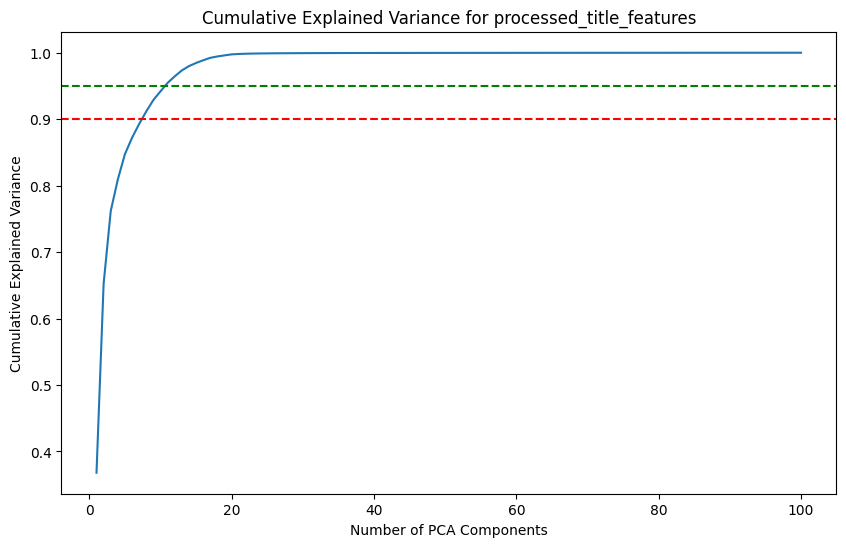

Number of components to explain 95.0% variance: 11


In [149]:
import numpy as np
from pyspark.ml.feature import PCA

# process_title_features selection to optimize
input_col = 'processed_title_features'

# Get the total number of dimensions in the feature
num_features = len(spark_df.select(input_col).first()[0])

# Fit PCA with a high number of components
pca = PCA(k=num_features, inputCol=input_col, outputCol="pca_features")
model = pca.fit(spark_df)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(model.explainedVariance)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title(f'Cumulative Explained Variance for {input_col}')
plt.axhline(y=0.90, color='r', linestyle='--')  # 90% variance line
plt.axhline(y=0.95, color='g', linestyle='--')  # 95% variance line
plt.show()

# Find the number of components for the desired variance threshold
desired_variance = 0.95
num_components_for_desired_variance = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f"Number of components to explain {desired_variance * 100}% variance: {num_components_for_desired_variance}")


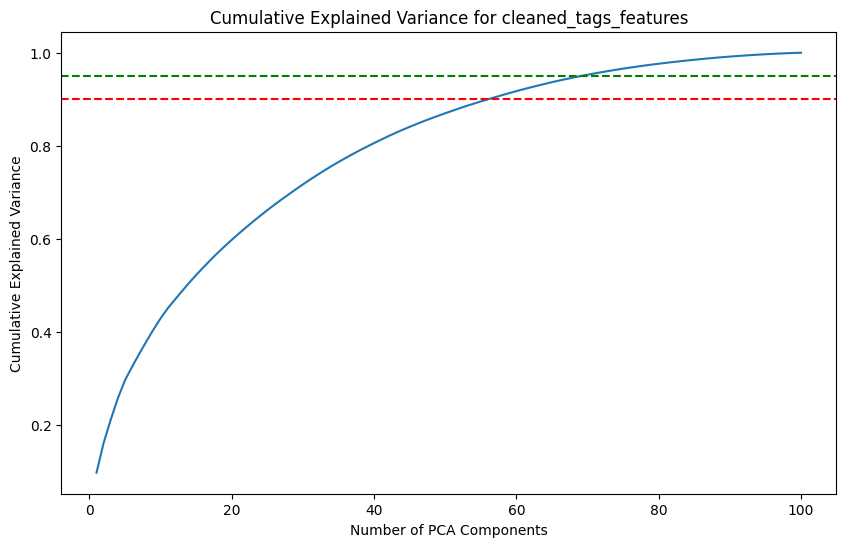

Number of components to explain 95.0% variance: 70


In [150]:
# cleaned_tags_features process and optimize
input_col = 'cleaned_tags_features'

# Get the total number of dimensions in the feature
num_features = len(spark_df.select(input_col).first()[0])

# Fit PCA with a high number of components
pca = PCA(k=num_features, inputCol=input_col, outputCol="pca_features1")
model = pca.fit(spark_df)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(model.explainedVariance)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title(f'Cumulative Explained Variance for {input_col}')
plt.axhline(y=0.90, color='r', linestyle='--')  # 90% variance line
plt.axhline(y=0.95, color='g', linestyle='--')  # 95% variance line
plt.show()

# Find the number of components for the desired variance threshold
desired_variance = 0.95
num_components_for_desired_variance = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f"Number of components to explain {desired_variance * 100}% variance: {num_components_for_desired_variance}")


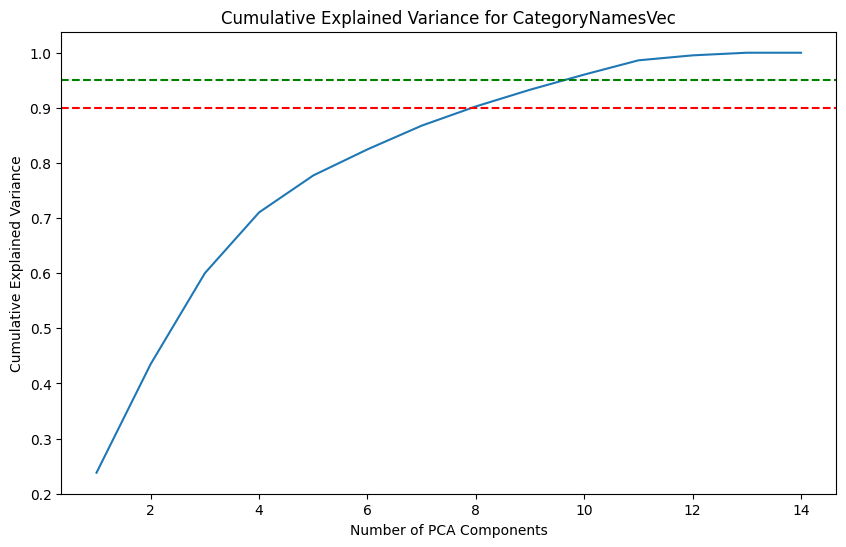

Number of components to explain 95.0% variance: 10


In [151]:
# CategoryNamesVec process and optimize
input_col = 'CategoryNamesVec'

# Get the total number of dimensions in the feature
num_features = len(spark_df.select(input_col).first()[0])

# Fit PCA with a high number of components
pca = PCA(k=num_features, inputCol=input_col, outputCol="pca_features2")
model = pca.fit(spark_df)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(model.explainedVariance)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title(f'Cumulative Explained Variance for {input_col}')
plt.axhline(y=0.90, color='r', linestyle='--')  # 90% variance line
plt.axhline(y=0.95, color='g', linestyle='--')  # 95% variance line
plt.show()

# Find the number of components for the desired variance threshold
desired_variance = 0.95
num_components_for_desired_variance = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f"Number of components to explain {desired_variance * 100}% variance: {num_components_for_desired_variance}")


In [152]:
from pyspark.ml.feature import PCA

# PCA for processed_title_features using K = 11 as recomended by elbow method
pca_processed_title = PCA(k=11, inputCol="processed_title_features", outputCol="processed_title_features_pca")
model_processed_title = pca_processed_title.fit(spark_df)
spark_df = model_processed_title.transform(spark_df)

# PCA for cleaned_tags_features K = 70 as recomended by elbow method
pca_cleaned_tags = PCA(k=70, inputCol="cleaned_tags_features", outputCol="cleaned_tags_features_pca")
model_cleaned_tags = pca_cleaned_tags.fit(spark_df)
spark_df = model_cleaned_tags.transform(spark_df)

# PCA for CategoryNamesVec K = 10 as recomended by elbow method
pca_category_names = PCA(k=10, inputCol="CategoryNamesVec", outputCol="CategoryNamesVec_pca")
model_category_names = pca_category_names.fit(spark_df)
spark_df = model_category_names.transform(spark_df)


In [153]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import DoubleType
from pyspark.ml.linalg import DenseVector
from pyspark.ml.stat import Correlation

# UDF to extract a specific component from a PCA vector
def extract_component_udf(index):
    return udf(lambda vector: float(vector[index]) if vector is not None else None, DoubleType())

# Number of PCA components to extract (5 was chossen in order to fit in df)
num_components_to_extract = 5

# Extract components for each PCA-transformed feature set
for i in range(num_components_to_extract):
    # For processed_title_features_pca
    spark_df = spark_df.withColumn(f'processed_title_features_pca_{i}', extract_component_udf(i)(col('processed_title_features_pca')))

    # For cleaned_tags_features_pca
    spark_df = spark_df.withColumn(f'cleaned_tags_features_pca_{i}', extract_component_udf(i)(col('cleaned_tags_features_pca')))

    # For CategoryNamesVec_pca
    spark_df = spark_df.withColumn(f'CategoryNamesVec_pca_{i}', extract_component_udf(i)(col('CategoryNamesVec_pca')))

# Selecting scaled numeric columns for correlation analysis
scaled_cols = ['view_count_scaled', 'likes_scaled', 'comment_count_scaled', 'days_until_trending_scaled']

# Assembling the PCA components
pca_component_cols = [f'{feature}_pca_{i}' for feature in ['processed_title_features', 'cleaned_tags_features', 'CategoryNamesVec'] for i in range(num_components_to_extract)]

# Assemble the selected columns into a feature vector
assembler = VectorAssembler(inputCols=scaled_cols + pca_component_cols, outputCol="features")
assembled_df = assembler.transform(spark_df)

# Compute the correlation matrix
corr_matrix = Correlation.corr(assembled_df, "features").collect()[0][0]

# Convert to Pandas DataFrame for visualization
corr_matrix_df = pd.DataFrame(corr_matrix.toArray())

# Setting column and index names for better readability
corr_matrix_df.columns = scaled_cols + pca_component_cols
corr_matrix_df.index = scaled_cols + pca_component_cols

# Display the correlation matrix
print(corr_matrix_df)


                                view_count_scaled  likes_scaled  comment_count_scaled  days_until_trending_scaled  processed_title_features_pca_0  processed_title_features_pca_1  processed_title_features_pca_2  processed_title_features_pca_3  processed_title_features_pca_4  cleaned_tags_features_pca_0  cleaned_tags_features_pca_1  cleaned_tags_features_pca_2  cleaned_tags_features_pca_3  cleaned_tags_features_pca_4  CategoryNamesVec_pca_0  CategoryNamesVec_pca_1  CategoryNamesVec_pca_2  CategoryNamesVec_pca_3  CategoryNamesVec_pca_4
view_count_scaled                        1.000000      0.784825              0.516799                    0.025820                        0.052854                   -3.503198e-02                   -2.261395e-02                   -3.340463e-02                    6.306211e-02                     0.047209                     0.004198                     0.033815                    -0.063535                     0.069386            9.068675e-02            2.76975

In [117]:
import pandas as pd

# Set Pandas display options to show the full DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Convert the correlation matrix to a Pandas DataFrame
corr_matrix_df = pd.DataFrame(corr_matrix.toArray())

# Setting column and index names for better readability
corr_matrix_df.columns = scaled_cols + pca_component_cols
corr_matrix_df.index = scaled_cols + pca_component_cols

# Display the full correlation matrix
print(corr_matrix_df)

# Identifying the most correlated columns
threshold = 0.5  # You can adjust this threshold
highly_correlated_pairs = {}

for col in corr_matrix_df.columns:
    for idx in corr_matrix_df.index:
        if idx == col:
            # Skip diagonal elements (self-correlation)
            continue
        corr_value = corr_matrix_df.loc[idx, col]
        if abs(corr_value) > threshold:
            highly_correlated_pairs[(idx, col)] = corr_value

# Display the most correlated pairs
print("Most Correlated Pairs:")
for pair, corr_value in highly_correlated_pairs.items():
    print(f"{pair}: {corr_value}")


                                view_count_scaled  likes_scaled  comment_count_scaled  days_until_trending_scaled  processed_title_features_pca_0  processed_title_features_pca_1  processed_title_features_pca_2  processed_title_features_pca_3  processed_title_features_pca_4  cleaned_tags_features_pca_0  cleaned_tags_features_pca_1  cleaned_tags_features_pca_2  cleaned_tags_features_pca_3  cleaned_tags_features_pca_4  CategoryNamesVec_pca_0  CategoryNamesVec_pca_1  CategoryNamesVec_pca_2  CategoryNamesVec_pca_3  CategoryNamesVec_pca_4
view_count_scaled                        1.000000      0.784825              0.516799                    0.025820                        0.052854                   -3.503198e-02                   -2.261395e-02                   -3.340463e-02                    6.306211e-02                     0.047209                     0.004198                     0.033815                    -0.063535                     0.069386            9.068675e-02            2.76975

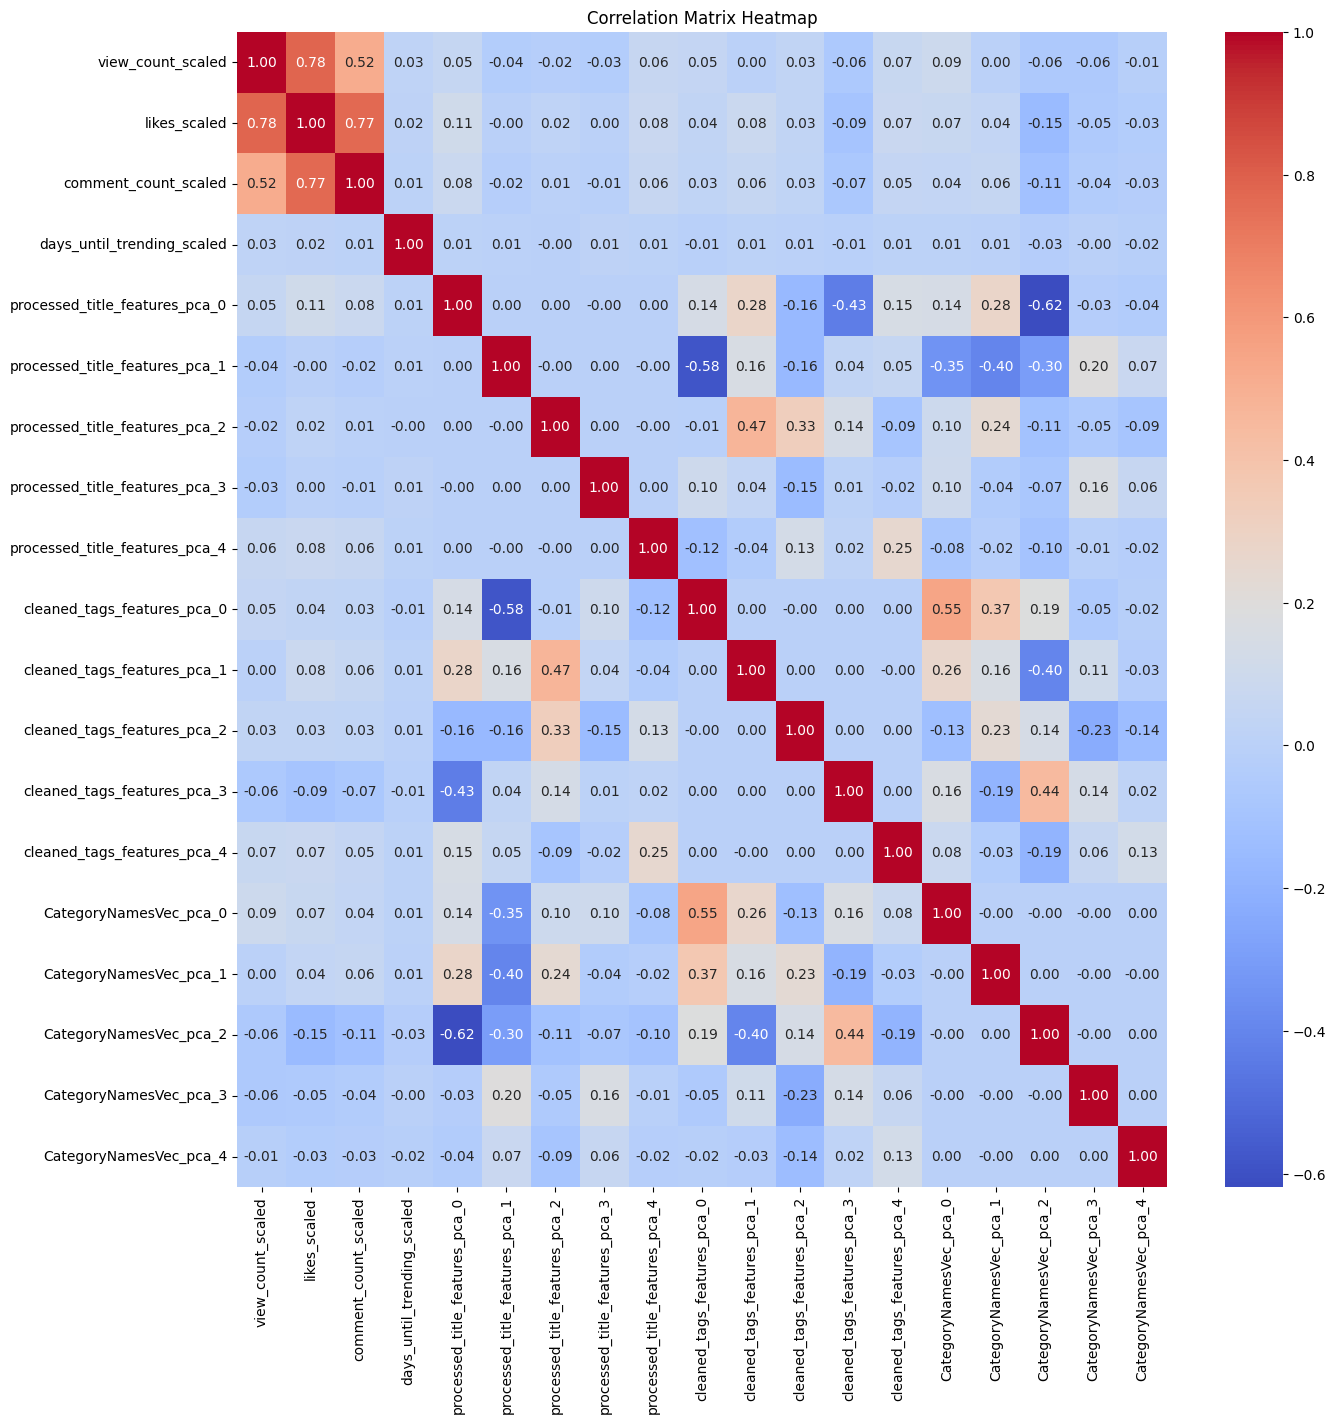

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame for visualization
# Assuming 'corr_matrix_df' is the Pandas DataFrame you already created
corr_matrix_df = pd.DataFrame(corr_matrix.toArray())

# Setting column and index names for better readability
scaled_cols = ['view_count_scaled', 'likes_scaled', 'comment_count_scaled', 'days_until_trending_scaled']
pca_component_cols = [f'{feature}_pca_{i}' for feature in ['processed_title_features', 'cleaned_tags_features', 'CategoryNamesVec'] for i in range(num_components_to_extract)]
corr_matrix_df.columns = scaled_cols + pca_component_cols
corr_matrix_df.index = scaled_cols + pca_component_cols

# Create a heatmap
plt.figure(figsize=(15, 15))  # You can adjust the size to fit your needs
sns.heatmap(corr_matrix_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Model Building and Training

In [155]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# Define the input columns with PCA components and the output feature vector
inputCols = [
    "processed_title_features_pca",
    "cleaned_tags_features_pca",
    "likes_scaled",
    "comment_count_scaled",
    "days_until_trending_scaled"
]
assembler = VectorAssembler(inputCols=inputCols, outputCol="features")

# Define the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="view_count_scaled")

# Define the Pipeline
pipeline = Pipeline(stages=[assembler, lr])

# Split the data into training and test sets
train_df, test_df = spark_df.randomSplit([0.7, 0.3], seed=42)

# Fit the model
model = pipeline.fit(train_df)

# Make predictions
predictions = model.transform(test_df)

# Evaluate the model
evaluator_rmse = RegressionEvaluator(labelCol="view_count_scaled", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="view_count_scaled", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="view_count_scaled", predictionCol="prediction", metricName="r2")

# Calculate evaluation metrics
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

# Display the evaluation metrics
print("Root Mean Squared Error (RMSE) on test data = ", rmse)
print("Mean Absolute Error (MAE) on test data = ", mae)
print("R-squared (R2) on test data = ", r2)

# Display sample predictions
predictions.select("prediction", "view_count", "features").show(5)


Root Mean Squared Error (RMSE) on test data =  0.017117474800568383
Mean Absolute Error (MAE) on test data =  0.0059263669700042754
R-squared (R2) on test data =  0.620260524423351
+--------------------+----------+--------------------+
|          prediction|view_count|            features|
+--------------------+----------+--------------------+
|0.013669465558127404|   2189817|[-0.7511867419607...|
|0.013041852051945135|   2038018|[-0.5980254207363...|
|0.012938487205438342|   3140430|[-0.8332559427903...|
|0.013079500295771748|   2776800|[-0.5650069632045...|
|0.003020817644142...|    741214|[-0.2048661611688...|
+--------------------+----------+--------------------+
only showing top 5 rows



#Result visualization

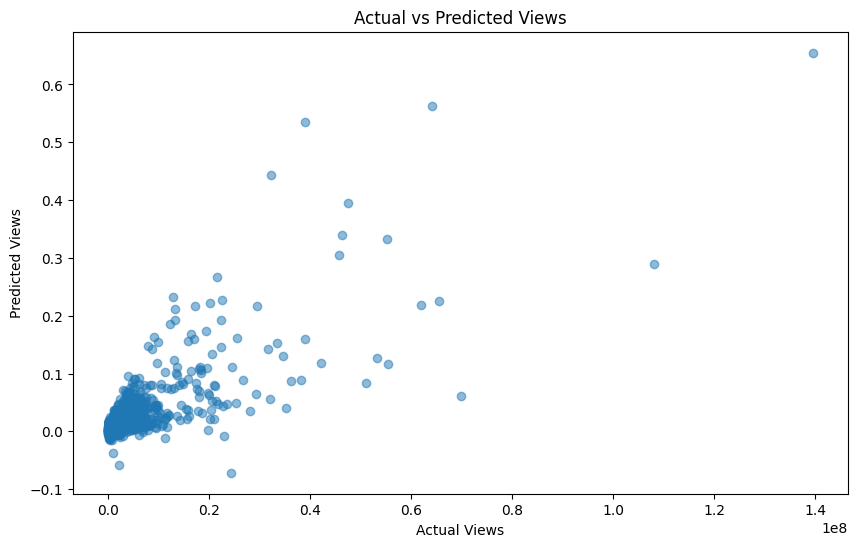

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for visualization
predictions_pd = predictions.select("prediction", "view_count").toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(predictions_pd['view_count'], predictions_pd['prediction'], alpha=0.5)
plt.title('Actual vs Predicted Views')
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.show()


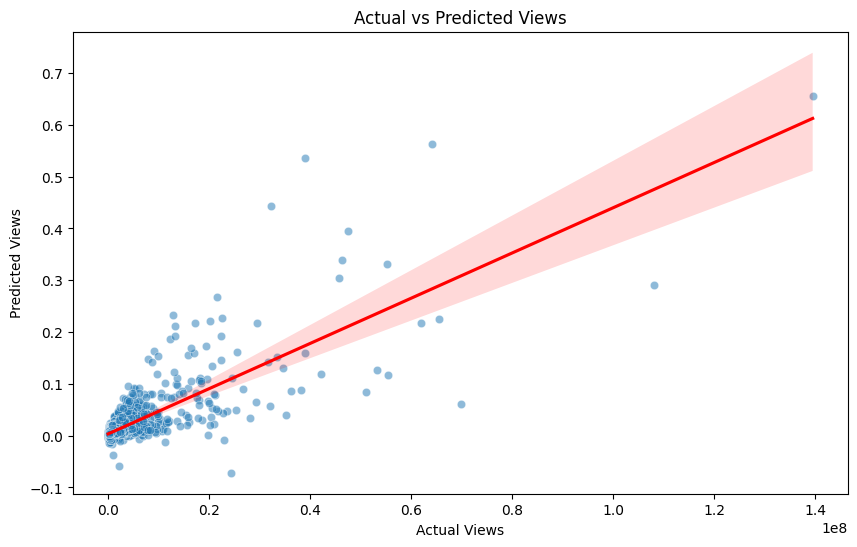

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame for visualization
# Assuming 'predictions' is your Spark DataFrame with 'prediction' and 'view_count' columns
predictions_pd = predictions.select("prediction", "view_count").toPandas()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='prediction', data=predictions_pd, alpha=0.5)
sns.regplot(x='view_count', y='prediction', data=predictions_pd, scatter=False, color='red')
plt.title('Actual vs Predicted Views')
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.show()